<a href="https://colab.research.google.com/github/Pranav260/Summary-generation-SNLP-project/blob/main/SLNP_project_vfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/MyDrive/SNLP_project

Mounted at /content/gdrive
/content/gdrive/MyDrive/SNLP_project


In [ ]:
import torch

In [ ]:
# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [ ]:
!pip install --quiet transformers datasets

     |████████████████████████████████| 4.0 MB 4.4 MB/s 
     |████████████████████████████████| 325 kB 41.9 MB/s 
     |████████████████████████████████| 895 kB 45.5 MB/s 
     |████████████████████████████████| 596 kB 58.4 MB/s 
     |████████████████████████████████| 6.6 MB 40.1 MB/s 
     |████████████████████████████████| 77 kB 5.8 MB/s 
     |████████████████████████████████| 136 kB 50.1 MB/s 
     |████████████████████████████████| 1.1 MB 48.6 MB/s 
     |████████████████████████████████| 212 kB 74.1 MB/s 
     |████████████████████████████████| 127 kB 60.7 MB/s 
     |████████████████████████████████| 144 kB 67.2 MB/s 
     |████████████████████████████████| 94 kB 2.6 MB/s 
     |████████████████████████████████| 271 kB 53.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which i

In [ ]:
import pandas as pd
import numpy as np
from dataclasses import dataclass, field
from sklearn.model_selection import train_test_split
from transformers import BartTokenizerFast
from datasets import Dataset

In [ ]:
df = pd.read_csv('article_and_summary.csv')

In [ ]:
df.head()

,topic,id,article,summary
0,tech,159.txt,A campaign by Lycos Europe to target spam-rela...,This is likely to be in response to spammers w...
1,tech,119.txt,"Jez San, the man behind the Argonaut games gro...","Jez San, the man behind the Argonaut games gro..."
2,tech,071.txt,Video games could soon be transplanted from th...,"""It is perhaps in a compromise between edutain..."
3,tech,004.txt,"Nicholas Negroponte, chairman and founder of M...","He said one laptop per child could be "" very i..."
4,tech,155.txt,The next-generation DVD format Blu-ray is winn...,The Blu-Ray Association said on Thursday that ...


In [ ]:
df['article'][1]

'Jez San, the man behind the Argonaut games group which went into administration a week ago, has bought back most of the company. The veteran games developer has taken over the Cambridge-based Just Add Monsters studios and the London subsidiary Morpheme. The Argonaut group went into administration due to a severe cash crisis, firing about half of its staff. In August it had warned of annual losses of £6m for the year to 31 July. Jez San is one of the key figures in the UK\'s games industry. The developer, who received an OBE in 2002, was estimated to have been worth more than £200m at the peak of the dotcom boom. He founded Argonaut in 1982 and has been behind titles such as 1993 Starfox game. More recently it was behind the Harry Potter games for the PlayStation. But, like all software developers, Argonaut needed a constant flow of deals with publishers. In August it warned of annual losses of £6m, blaming delays in signing new contracts and tough conditions in the software industry. 

In [ ]:
df['summary'][1]

"Jez San, the man behind the Argonaut games group which went into administration a week ago, has bought back most of the company.He founded Argonaut in 1982 and has been behind titles such as 1993 Starfox game.The veteran games developer has taken over the Cambridge-based Just Add Monsters studios and the London subsidiary Morpheme.Mr Rubin said the administrators were in talks over the sale of the Argonaut software division in Edgware and were hopeful of finding a buyer.Mr San has re-emerged, buying back Morpheme and Just Add Monsters.The Argonaut group went into administration due to a severe cash crisis, firing about half of its staff.More recently it was behind the Harry Potter games for the PlayStation.Jez San is one of the key figures in the UK's games industry."

In [ ]:
len(df)

2224

In [ ]:
#df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.drop(columns=['id','topic'],axis=1,inplace=True)
df = df.dropna()
print("Data size", len(df))
df.head()

Data size 2224


,article,summary
0,A campaign by Lycos Europe to target spam-rela...,This is likely to be in response to spammers w...
1,"Jez San, the man behind the Argonaut games gro...","Jez San, the man behind the Argonaut games gro..."
2,Video games could soon be transplanted from th...,"""It is perhaps in a compromise between edutain..."
3,"Nicholas Negroponte, chairman and founder of M...","He said one laptop per child could be "" very i..."
4,The next-generation DVD format Blu-ray is winn...,The Blu-Ray Association said on Thursday that ...


In [ ]:
train_data= Dataset.from_pandas(df[:1668])
val_data = Dataset.from_pandas(df[1668:1900])
test_data = Dataset.from_pandas(df[1900:])

In [ ]:
test_data

Dataset({
    features: ['article', 'summary', '__index_level_0__'],
    num_rows: 324
})

In [ ]:
df.head()

,article,summary
0,A campaign by Lycos Europe to target spam-rela...,This is likely to be in response to spammers w...
1,"Jez San, the man behind the Argonaut games gro...","Jez San, the man behind the Argonaut games gro..."
2,Video games could soon be transplanted from th...,"""It is perhaps in a compromise between edutain..."
3,"Nicholas Negroponte, chairman and founder of M...","He said one laptop per child could be "" very i..."
4,The next-generation DVD format Blu-ray is winn...,The Blu-Ray Association said on Thursday that ...


In [ ]:
df['new_column'] = df['summary'].str.count(' ') + 1

In [ ]:
np.mean(df['new_column'])

165.20053956834533

In [ ]:
max(df['new_column'])

2074

In [ ]:
del df['new_column']

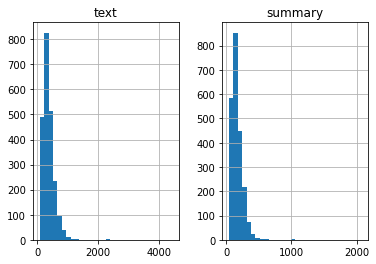

In [ ]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in df['article']:
      text_word_count.append(len(i.split()))

for i in df['summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 30)
plt.show()

In [ ]:
tokenizer = BartTokenizerFast.from_pretrained("facebook/bart-base")
tokenizer.bos_token = tokenizer.cls_token
tokenizer.eos_token = tokenizer.sep_token

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

In [ ]:
encoder_max_length = 500
decoder_max_length= 160

batch_size=16
#change to batch["Text"] and batch["Summary"] for amazon review dataset
def process_data_to_model_inputs(batch):
  #tokenizer() will convert the text into tokens and padding for combining the tokens
  inputs = tokenizer.batch_encode_plus(batch["article"], padding="max_length", truncation=True, max_length=encoder_max_length)
  outputs = tokenizer.batch_encode_plus(batch["summary"], padding="max_length", truncation=True, max_length=decoder_max_length)
  #These are the tokens : input ids, attention mask etc.
  batch["input_ids"] = inputs.input_ids
  batch["attention_mask"] = inputs.attention_mask
  #batch["decoder_input_ids"] = outputs.input_ids
  #batch["decoder_attention_mask"] = outputs.attention_mask
  batch["labels"] = outputs.input_ids.copy()

  batch["labels"] = [[-100 if token == tokenizer.pad_token_id else token for token in labels] for labels in batch["labels"]]

  return batch

In [ ]:
train_data = train_data.map(
    process_data_to_model_inputs,
    batched=True,
    batch_size=batch_size,
    remove_columns=["article", "summary"]
)
train_data.set_format(
    type="torch", columns=["input_ids", "attention_mask", "labels"],)
val_data = val_data.map(
    process_data_to_model_inputs,
    batched=True,
    batch_size=batch_size,
    remove_columns=["article", "summary"]
)
val_data.set_format(
    type="torch", columns=["input_ids", "attention_mask", "labels"],
)

  0%|          | 0/105 [00:00<?, ?ba/s]

  0%|          | 0/15 [00:00<?, ?ba/s]

In [ ]:
train_data

Dataset({
    features: ['__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 1668
})

In [ ]:
from transformers import BartForConditionalGeneration, BartConfig,BartModel

bart_premodel = BartForConditionalGeneration.from_pretrained('facebook/bart-base')

Downloading:   0%|          | 0.00/532M [00:00<?, ?B/s]

In [ ]:
#Change the configurations for more fine tuning

configuration = BartConfig()

#Use this for some cases
#bart_pre1_optional = BartModel(configuration)

# set special tokens
bart_premodel.config.decoder_start_token_id = tokenizer.bos_token_id
bart_premodel.config.eos_token_id = tokenizer.eos_token_id

#bart_premodel.config.activation_function = 'gelu'
# sensible parameters for beam search
# set decoding params
bart_premodel.config.max_length = 150
#bart_premodel.config.min_length = 30
bart_premodel.config.early_stopping = True
bart_premodel.config.no_repeat_ngram_size = 3
bart_premodel.config.length_penalty = 2.0
bart_premodel.config.num_beams = 4
bart_premodel.config.vocab_size = configuration.vocab_size
bart_premodel.encoder_layerdrop = 0.2

## Seq2Seq Trainer

In [ ]:
from typing import Any, Dict, List, Optional, Tuple, Union

import torch
from packaging import version
from torch import nn
from torch.utils.data.dataset import Dataset

from transformers.trainer import Trainer
from transformers.trainer_utils import PredictionOutput
from transformers.utils import logging


if version.parse(torch.__version__) >= version.parse("1.6"):
    from torch.cuda.amp import autocast


logger = logging.get_logger(__name__)


class Seq2SeqTrainer(Trainer):
    def evaluate(
        self,
        eval_dataset: Optional[Dataset] = None,
        ignore_keys: Optional[List[str]] = None,
        metric_key_prefix: str = "eval",
        max_length: Optional[int] = None,
        num_beams: Optional[int] = None,
    ) -> Dict[str, float]:
        """
        Run evaluation and returns metrics.
        The calling script will be responsible for providing a method to compute metrics, as they are task-dependent
        (pass it to the init :obj:`compute_metrics` argument).
        You can also subclass and override this method to inject custom behavior.
        Args:
            eval_dataset (:obj:`Dataset`, `optional`):
                Pass a dataset if you wish to override :obj:`self.eval_dataset`. If it is an :obj:`datasets.Dataset`,
                columns not accepted by the ``model.forward()`` method are automatically removed. It must implement the
                :obj:`__len__` method.
            ignore_keys (:obj:`List[str]`, `optional`):
                A list of keys in the output of your model (if it is a dictionary) that should be ignored when
                gathering predictions.
            metric_key_prefix (:obj:`str`, `optional`, defaults to :obj:`"eval"`):
                An optional prefix to be used as the metrics key prefix. For example the metrics "bleu" will be named
                "eval_bleu" if the prefix is ``"eval"`` (default)
            max_length (:obj:`int`, `optional`):
                The maximum target length to use when predicting with the generate method.
            num_beams (:obj:`int`, `optional`):
                Number of beams for beam search that will be used when predicting with the generate method. 1 means no
                beam search.
        Returns:
            A dictionary containing the evaluation loss and the potential metrics computed from the predictions. The
            dictionary also contains the epoch number which comes from the training state.
        """
        self._max_length = max_length
        self._num_beams = num_beams
        return super().evaluate(eval_dataset, ignore_keys=ignore_keys, metric_key_prefix=metric_key_prefix)

    def predict(
        self,
        val_dataset: Dataset,
        ignore_keys: Optional[List[str]] = None,
        metric_key_prefix: str = "eval",
        max_length: Optional[int] = None,
        num_beams: Optional[int] = None,
    ) -> PredictionOutput:
        """
        Run prediction and returns predictions and potential metrics.
        Depending on the dataset and your use case, your test dataset may contain labels. In that case, this method
        will also return metrics, like in :obj:`evaluate()`.
        Args:
            val_dataset (:obj:`Dataset`):
                Dataset to run the predictions on. If it is an :obj:`datasets.Dataset`, columns not accepted by the
                ``model.forward()`` method are automatically removed. Has to implement the method :obj:`__len__`
            ignore_keys (:obj:`List[str]`, `optional`):
                A list of keys in the output of your model (if it is a dictionary) that should be ignored when
                gathering predictions.
            metric_key_prefix (:obj:`str`, `optional`, defaults to :obj:`"eval"`):
                An optional prefix to be used as the metrics key prefix. For example the metrics "bleu" will be named
                "eval_bleu" if the prefix is ``"eval"`` (default)
            max_length (:obj:`int`, `optional`):
                The maximum target length to use when predicting with the generate method.
            num_beams (:obj:`int`, `optional`):
                Number of beams for beam search that will be used when predicting with the generate method. 1 means no
                beam search.
        .. note::
            If your predictions or labels have different sequence lengths (for instance because you're doing dynamic
            padding in a token classification task) the predictions will be padded (on the right) to allow for
            concatenation into one array. The padding index is -100.
        Returns: `NamedTuple` A namedtuple with the following keys:
            - predictions (:obj:`np.ndarray`): The predictions on :obj:`val_dataset`.
            - label_ids (:obj:`np.ndarray`, `optional`): The labels (if the dataset contained some).
            - metrics (:obj:`Dict[str, float]`, `optional`): The potential dictionary of metrics (if the dataset
              contained labels).
        """
        self._max_length = max_length
        self._num_beams = num_beams
        return super().predict(val_dataset, ignore_keys=ignore_keys, metric_key_prefix=metric_key_prefix)

    def prediction_step(
        self,
        model: nn.Module,
        inputs: Dict[str, Union[torch.Tensor, Any]],
        prediction_loss_only: bool,
        ignore_keys: Optional[List[str]] = None,
    ) -> Tuple[Optional[float], Optional[torch.Tensor], Optional[torch.Tensor]]:
        """
        Perform an evaluation step on :obj:`model` using obj:`inputs`.
        Subclass and override to inject custom behavior.
        Args:
            model (:obj:`nn.Module`):
                The model to evaluate.
            inputs (:obj:`Dict[str, Union[torch.Tensor, Any]]`):
                The inputs and targets of the model.
                The dictionary will be unpacked before being fed to the model. Most models expect the targets under the
                argument :obj:`labels`. Check your model's documentation for all accepted arguments.
            prediction_loss_only (:obj:`bool`):
                Whether or not to return the loss only.
        Return:
            Tuple[Optional[float], Optional[torch.Tensor], Optional[torch.Tensor]]: A tuple with the loss, logits and
            labels (each being optional).
        """

        if not self.args.predict_with_generate or prediction_loss_only:
            return super().prediction_step(
                model, inputs, prediction_loss_only=prediction_loss_only, ignore_keys=ignore_keys
            )

        has_labels = "labels" in inputs
        inputs = self._prepare_inputs(inputs)

        gen_kwargs = {
            "max_length": self._max_length if self._max_length is not None else self.model.config.max_length,
            "num_beams": self._num_beams if self._num_beams is not None else self.model.config.num_beams,
        }

        generated_tokens = self.model.generate(
            inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            **gen_kwargs,
        )
        # in case the batch is shorter than max length, the output should be padded
        if generated_tokens.shape[-1] < gen_kwargs["max_length"]:
            generated_tokens = self._pad_tensors_to_max_len(generated_tokens, gen_kwargs["max_length"])

        with torch.no_grad():
            if self.use_amp:
                with autocast():
                    outputs = model(**inputs)
            else:
                outputs = model(**inputs)
            if has_labels:
                if self.label_smoother is not None:
                    loss = self.label_smoother(outputs, inputs["labels"]).mean().detach()
                else:
                    loss = (outputs["loss"] if isinstance(outputs, dict) else outputs[0]).mean().detach()
            else:
                loss = None

        if self.args.prediction_loss_only:
            return (loss, None, None)

        labels = inputs["labels"]
        if labels.shape[-1] < gen_kwargs["max_length"]:
            labels = self._pad_tensors_to_max_len(labels, gen_kwargs["max_length"])

        return (loss, generated_tokens, labels)

    def _pad_tensors_to_max_len(self, tensor, max_length):
        if self.tokenizer is None:
            raise ValueError(
                f"Tensor need to be padded to `max_length={max_length}` but no tokenzier was passed when creating "
                "this `Trainer`. Make sure to create your `Trainer` with the appropriate tokenizer."
            )
        # If PAD token is not defined at least EOS token has to be defined
        pad_token_id = (
            self.tokenizer.pad_token_id if self.tokenizer.pad_token_id is not None else self.tokenizer.eos_token_id
        )

        padded_tensor = pad_token_id * torch.ones(
            (tensor.shape[0], max_length), dtype=tensor.dtype, device=tensor.device
        )
        padded_tensor[:, : tensor.shape[-1]] = tensor
        return padded_tensor

In [ ]:
from transformers import TrainingArguments,Trainer
from dataclasses import dataclass, field
from typing import Optional
from transformers.file_utils import add_start_docstrings
import logging

In [ ]:
@dataclass
class Seq2SeqTrainingArguments(TrainingArguments):
    """
    sortish_sampler (:obj:`bool`, `optional`, defaults to :obj:`False`):
        Whether to use a `sortish sampler` or not. Only possible if the underlying datasets are `Seq2SeqDataset` for
        now but will become generally available in the near future.
        It sorts the inputs according to lengths in order to minimize the padding size, with a bit of randomness for
        the training set.
    predict_with_generate (:obj:`bool`, `optional`, defaults to :obj:`False`):
        Whether to use generate to calculate generative metrics (ROUGE, BLEU).
    """

    sortish_sampler: bool = field(default=False, metadata={"help": "Whether to use SortishSampler or not."})

    predict_with_generate: bool = field(
        default=False, metadata={"help": "Whether to use generate to calculate generative metrics (ROUGE, BLEU)."}
    )

    label_smoothing: Optional[float] = field(
        default=0.0, metadata={"help": "The label smoothing epsilon to apply (if not zero)."}
    )

    adafactor: bool = field(default=False, metadata={"help": "whether to use adafactor"})

    encoder_layerdrop: Optional[float] = field(
        default=0.2, metadata={"help": "Encoder layer dropout probability. Goes into model.config."}
    )

#Layer drop rate as 0.2 for regularization
    decoder_layerdrop: Optional[float] = field(
        default=0.2, metadata={"help": "Decoder layer dropout probability. Goes into model.config."}
    )

    dropout: Optional[float] = field(default=None, metadata={"help": "Dropout probability. Goes into model.config."})

    attention_dropout: Optional[float] = field(
        default=None, metadata={"help": "Attention dropout probability. Goes into model.config."}
    )

    lr_scheduler: Optional[str] = field(
        default="linear", metadata={"help": f"Which lr scheduler to use."}
    )

In [ ]:
!pip install rouge_score

In [ ]:
import datasets
# load rouge for validation
rouge = datasets.load_metric("rouge")

def compute_metrics(pred):
    labels_ids = pred.label_ids
    pred_ids = pred.predictions

    # all unnecessary tokens are removed
    decoded_pred_str = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
    #labels_ids[labels_ids == -100] = tokenizer.pad_token_id
    if data_args.ignore_pad_token_for_loss:
            # Replace -100 in the labels as we can't decode them.
            labels_ids = np.where(labels_ids != -100, labels_ids, tokenizer.pad_token_id)

    decoded_label_str = tokenizer.batch_decode(labels_ids, skip_special_tokens=True)

    rouge_output = rouge.compute(predictions=decoded_pred_str, references=decoded_label_str, use_stemmer=True)
    rouge_output = {key: value.mid.fmeasure * 100 for key, value in rouge_output.items()}

    '''
    return {
        "rouge2_precision": round(rouge_output.precision, 4),
        "rouge2_recall": round(rouge_output.recall, 4),
        "rouge2_fmeasure": round(rouge_output.fmeasure, 4),
    }
    '''

    #OR

    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in pred_ids]
    rouge_output["gen_len"] = np.mean(prediction_lens)
    rouge_output = {k: round(v, 4) for k, v in result.items()}
    print(rouge_output)
    return rouge_output

In [ ]:
torch.cuda.empty_cache()

In [ ]:
training_args = Seq2SeqTrainingArguments(
    output_dir="/content/gdrive/MyDrive/Colab Notebooks",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    predict_with_generate=True,
    do_train=True,
    do_eval=True,
    logging_steps=50,
    save_steps=200,
    eval_steps=200,
    warmup_steps=100,
    overwrite_output_dir=True,
    save_total_limit=1,
    weight_decay = 0.01,
    fp16=True,
    num_train_epochs = 8 ,
)

# instantiate trainer
trainer = Seq2SeqTrainer(
    model=bart_premodel,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_data,
    eval_dataset=val_data,
)

Using amp half precision backend


In [ ]:
print(training_args)

Seq2SeqTrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
attention_dropout=None,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
debug=[],
decoder_layerdrop=0.2,
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=True,
dropout=None,
encoder_layerdrop=0.2,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=200,
evaluation_strategy=IntervalStrategy.NO,
fp16=True,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
half_precision_backend=amp,
hub_model_id=None,
hub_strategy=HubStrategy.EVERY_SAVE,
hub_token=<HUB_TOKEN>,
ignore_data_skip=False,
label_names=None,
label_smoothing=0.0,
label_smoothing_factor=0.0,
learning_rate=5e-05,
length_column_name=length,
l

In [ ]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `BartForConditionalGeneration.forward` and have been ignored: __index_level_0__. If __index_level_0__ are not expected by `BartForConditionalGeneration.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 1668
  Num Epochs = 8
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 840


Step,Training Loss
50,1.585100
100,0.665700
150,0.569700
200,0.532400
250,0.431800
300,0.458100
350,0.402500
400,0.363900
450,0.378200
500,0.323600


Saving model checkpoint to /content/gdrive/MyDrive/Colab Notebooks/checkpoint-200
Configuration saved in /content/gdrive/MyDrive/Colab Notebooks/checkpoint-200/config.json
Model weights saved in /content/gdrive/MyDrive/Colab Notebooks/checkpoint-200/pytorch_model.bin
Saving model checkpoint to /content/gdrive/MyDrive/Colab Notebooks/checkpoint-400
Configuration saved in /content/gdrive/MyDrive/Colab Notebooks/checkpoint-400/config.json
Model weights saved in /content/gdrive/MyDrive/Colab Notebooks/checkpoint-400/pytorch_model.bin
Deleting older checkpoint [/content/gdrive/MyDrive/Colab Notebooks/checkpoint-200] due to args.save_total_limit
Saving model checkpoint to /content/gdrive/MyDrive/Colab Notebooks/checkpoint-600
Configuration saved in /content/gdrive/MyDrive/Colab Notebooks/checkpoint-600/config.json
Model weights saved in /content/gdrive/MyDrive/Colab Notebooks/checkpoint-600/pytorch_model.bin
Deleting older checkpoint [/content/gdrive/MyDrive/Colab Notebooks/checkpoint-400] d

TrainOutput(global_step=840, training_loss=0.4550893987928118, metrics={'train_runtime': 509.778, 'train_samples_per_second': 26.176, 'train_steps_per_second': 1.648, 'total_flos': 3972814110720000.0, 'train_loss': 0.4550893987928118, 'epoch': 8.0})

In [ ]:
test_data

In [ ]:
import datasets
from transformers import BartTokenizerFast, EncoderDecoderModel,BartForConditionalGeneration

tokenizer = BartTokenizerFast.from_pretrained("facebook/bart-base")
model = BartForConditionalGeneration.from_pretrained("/content/gdrive/MyDrive/Colab Notebooks/checkpoint-800")
model.to("cuda")
batch_size = 4 #Change to 8000 for full training

#val_data = datasets.load_dataset("cnn_dailymail", "3.0.0", split="test")

# only use 16 training examples for notebook - DELETE LINE FOR FULL TRAINING
#val_data = val_data.select(range(16))


# map data correctly
def generate_summary(batch):
    # Tokenizer will automatically set [BOS] <text> [EOS]
    inputs = tokenizer(batch["article"], padding="max_length", truncation=True, max_length=1024, return_tensors="pt")
    input_ids = inputs.input_ids.to("cuda")
    attention_mask = inputs.attention_mask.to("cuda")

    outputs = model.generate(input_ids, attention_mask=attention_mask)

    # all special tokens including will be removed
    output_str = tokenizer.batch_decode(outputs, skip_special_tokens=True)

    batch["pred"] = output_str

    return batch



results = test_data.map(generate_summary, batched=True, batch_size=batch_size)

pred_str = results["pred"]
label_str = results["summary"]

#rouge_output = rouge.compute(predictions=pred_str, references=label_str, rouge_types=["rouge2"])["rouge2"].mid
rouge_output = rouge.compute(predictions=pred_str, references=label_str, use_stemmer=True)
# Extract a few results from ROUGE
rouge_output = {key: value.mid.fmeasure * 100 for key, value in rouge_output.items()}

print(rouge_output)

  0%|          | 0/81 [00:00<?, ?ba/s]

{'rouge1': 66.32235285441845, 'rouge2': 56.90042555351529, 'rougeL': 47.882438386676085, 'rougeLsum': 47.8492716679994}


In [ ]:
head = ['summary','pred']
results.to_csv("test_predictions.csv", header=True, index=False, sep=";",columns = head)

Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

482865

In [ ]:
results['article'][]

'The head of US TV network Fox has admitted the broadcaster had relied too heavily on reality TV shows such as the poor-rating Who\'s Your Daddy. Chief executive Gail Berman said "in the case of this fall we drifted to too much on the unscripted side". The series Who\'s Your Daddy, where a young woman tries to pick her natural father for a cash prize caused outrage from adoption groups and rated badly. Last season, Fox\'s prime-time audience fell by 600,000 to 5.9 million. Ms Berman said: "I think the audience expects loud things from Fox. Sometimes they work, and sometimes they don\'t." Who\'s Your Daddy, the first episode of which was shown on 3 January, pulled in a disappointing audience of 6.3 million, according to the Nielsen ratings system. Five other episodes of the show had also been filmed will be dropped from Fox\'s schedules, Ms Berman said. She was predicting a drop in ratings even for some of the network\'s established reality shows, such as American Idol, which is due to 

In [ ]:
pred_str[10]

'She made her first Carry On film in 1969 where she appeared in Carry On Again Doctor.Actress Patsy Rowlands, known to millions for her roles in the Carry On films, has died at the age of 71.She also appeared in carry On at your Convenience, Carry On Matron and Carry On Loving, as well as others.Rowlands played the hard-done-by wife or the put-upon employee as a regular Carry On star.She was of the old school - she had skills from musical theatre and high drama, that is why she worked with the great and the good of directors.Her last appearance on stage was as Mrs Pearce in the award-winning production of My Fair Lady at the National'

In [ ]:
label_str[10]

'She made her first Carry On film in 1969 where she appeared in Carry On Again Doctor.She also appeared in Carry On at your Convenience, Carry On Matron and Carry On Loving, as well as others.Rowlands played the hard-done-by wife or the put-upon employee as a regular Carry On star.Actress Patsy Rowlands, known to millions for her roles in the Carry On films, has died at the age of 71.Agent Simon Beresford said: "She was just an absolutely favourite client She never complained about anything, particularly when she was ill, she was an old trouper.Born in January 1934, Rowlands won a scholarship to the Guildhall School of Speech and Drama scholarship when she was just 15.Rowlands starred in nine of the popular Carry On films, alongside fellow regulars Sid James, Kenneth Williams and Barbara Windsor.'

In [ ]:
max(pred_str)

'Young book fans have voted Fergus Crane, a story about a boy who is taken on an adventure by a flying horse, the winner of two Smarties Book Prizes.Paul Stewart and Chris Riddell\'s book came top in the category for six- to eight-year-olds and won the award chosen by after-school club members."This year\'s young judges chose the winners from an exceptionally strong and varied shortlist which showcases the very best in children\'s books today."Winners were voted for by about 6,000 children from a shortlist picked by an adult panel."This award counts because the final choice of winners is made by children, who are the toughest critics of all," she said.'

In [ ]:
rouge_output = rouge.compute(predictions=df['article'], references=df['summary'], use_stemmer=True)
# Extract a few results from ROUGE
rouge_output = {key: value.mid.fmeasure * 100 for key, value in rouge_output.items()}

print(rouge_output)

### Pipeline approach

In [ ]:
input_to_pret = df['article'][1900:]
input_to_pret = input_to_pret.to_numpy()

In [ ]:
from transformers import pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

Downloading:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.51G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [ ]:
summary_pred = []
for i in range(1900,len(df)):
  try:
    summary_pred.append(summarizer(df.loc[i]['article'], max_length=160)[0]['summary_text'])
  except:
    print(i)


Token indices sequence length is longer than the specified maximum sequence length for this model (2896 > 1024). Running this sequence through the model will result in indexing errors


1920
1960
2097
2129
2148
2170
2213


In [ ]:
summarizer(df.loc[1910]['article'], max_length=300)

[{'summary_text': "Rowlands starred in nine of the popular Carry On films, alongside fellow regulars Sid James, Kenneth Williams and Barbara Windsor. She also carved out a successful television career, appearing for many years in ITV's Bless This House. Rowlands won a scholarship to the Guildhall School of Speech and Drama when she was just 15."}]

In [ ]:
max(summary_pred)

"£11.5m show will make its debut in Toronto in March 2006. All three West End theatres with sufficient capacity were booked. Musical is not expected in London before December 2006. Up to five British actors may join the cast, under a deal struck with Canadian Actors' Equity."

In [ ]:
rem = [1920,1960,2097,2129,2148,2170,2213]

In [ ]:
df_pip = df.drop(labels = rem,axis = 0 )
df_pip = df_pip.drop(labels = range(1900), axis = 0)

In [ ]:
df_pip['generated_summary'] = summary_pred

In [ ]:
df_pip['generated_summary'][1910]

"Rowlands starred in nine of the popular Carry On films, alongside fellow regulars Sid James, Kenneth Williams and Barbara Windsor. She also carved out a successful television career, appearing for many years in ITV's Bless This House. Rowlands won a scholarship to the Guildhall School of Speech and Drama when she was just 15."

In [ ]:
rouge_output = rouge.compute(predictions=df_pip['generated_summary'], references=df_pip['summary'], use_stemmer=True)
# Extract a few results from ROUGE
rouge_output = {key: value.mid.fmeasure * 100 for key, value in rouge_output.items()}

print(rouge_output)

{'rouge1': 39.48918986961718, 'rouge2': 27.153957388775197, 'rougeL': 28.974656199782295, 'rougeLsum': 29.024193713065337}


In [ ]:
head = ['summary','generated_summary']
df_pip.to_csv("test_predictions_pip.csv", header=True, index=False, sep=";",columns = head)

### Clustering Approach

In [ ]:
df_clus = pd.read_csv('article_and_summary_with_clustering.csv')

In [ ]:
df_clus.head()

,topic,id,article,summary,clustering_summary
0,tech,159.txt,A campaign by Lycos Europe to target spam-rela...,This is likely to be in response to spammers w...,A campaign by Lycos Europe to target spam-rela...
1,tech,119.txt,"Jez San, the man behind the Argonaut games gro...","Jez San, the man behind the Argonaut games gro...","Jez San, the man behind the Argonaut games gro..."
2,tech,071.txt,Video games could soon be transplanted from th...,"""It is perhaps in a compromise between edutain...",Most game firms are too busy turning a profit ...
3,tech,004.txt,"Nicholas Negroponte, chairman and founder of M...","He said one laptop per child could be "" very i...",He said the child could use the laptop like a ...
4,tech,155.txt,The next-generation DVD format Blu-ray is winn...,The Blu-Ray Association said on Thursday that ...,"Blu-ray, backed by 100 firms including Sony, i..."


In [ ]:
df_clus['clustering_summary'][1910]

'Rowlands starred in nine of the popular Carry On films, alongside fellow regulars Sid James, Kenneth Williams and Barbara Windsor. Rowlands died in Hove on Saturday morning, her agent said. Born in January 1934, Rowlands won a scholarship to the Guildhall School of Speech and Drama scholarship when she was just 15. After spending several years at the Players Theatre in London, she made her film debut in 1963 in Tom Jones, directed by Tony Richardson. She also appeared in Carry On at your Convenience, Carry On Matron and Carry On Loving, as well as others. "She didn\'t mind always being recognised for the Carry On films because she thoroughly enjoyed making them. Previously married, she leaves one son, Alan.'

In [ ]:
rouge_output = rouge.compute(predictions=df_clus['clustering_summary'], references=df_clus['summary'], use_stemmer=True)
# Extract a few results from ROUGE
rouge_output = {key: value.mid.fmeasure * 100 for key, value in rouge_output.items()}

print(rouge_output)

{'rouge1': 58.1102806031265, 'rouge2': 44.511362678478385, 'rougeL': 37.701296972046656, 'rougeLsum': 37.72086455589076}


In [ ]:
#Save the model
model_save_name = 'summarizer.pt'
torch.save(model.state_dict())